행렬 A∈Cm×n와 벡터 b∈Cm  에 대해 b∉C(A)이면 방정식 Ax=b는 해를 갖지 않고 x∗=argmin∥b−Ax∥2
를 최소제곱해라고 정의한다.


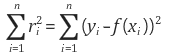

최소자승법을 계산하는 방법은 크게 해석학적(analytic) 방법과 대수적(algebraic) 방법이 있는데 대수적 방법이 훨씬 직관적이면서도 효과적이다 

먼저, 대수적 방법은 위의 모델 추정 문제를 행렬식 형태로 표현한 후에 선형대수학을 적용하는 방법이다. 위에서 예로 든 직선 f(x) = ax +b 추정 문제는 결국 다음 식들을 만족하는 a, b를 찾는 것이다.

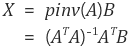


이를 행렬식으로 표현하면 다음과 같다.

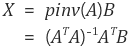


이 때, A의 역행렬은 존재하지 않지만 pseudo inverse라는 걸 이용하면 X를 다음과 같이 계산할 수 있다


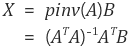


cf>C. 비선형 최소자승법 (non-linear least square) 는 뉴턴법/뉴턴-랩슨법의 이해와 활용(Newton's method)을 활용



In [8]:
import numpy as np
import numpy.linalg as LA
from sympy import *

np.set_printoptions(precision=4)

In [9]:
A=np.array([[4, 0],[0,2],[1,1]])

A

array([[4, 0],
       [0, 2],
       [1, 1]])

In [10]:
b=np.array([[2],[0],[11]])
    
b

array([[ 2],
       [ 0],
       [11]])

In [11]:
Matrix(np.c_[A, b]).rref()

(Matrix([
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1]]), (0, 1, 2))

In [12]:
ATA=np.dot(A.T, A);ATA

array([[17,  1],
       [ 1,  5]])

In [13]:
ATb=np.dot(A.T, b);ATb

array([[19],
       [11]])

In [14]:
 hatx=LA.solve(ATA, ATb);hatx

array([[1.],
       [2.]])

2. 행렬 A에 대한 Ax=b의 최소최적해?


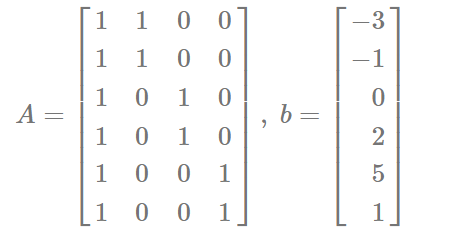


In [15]:
A=np.array([[1,1,0,0],[1,1,0,0],[1,0,1,0],[1,0,1,0],[1,0,0,1],[1,0,0,1]]); A

array([[1, 1, 0, 0],
       [1, 1, 0, 0],
       [1, 0, 1, 0],
       [1, 0, 1, 0],
       [1, 0, 0, 1],
       [1, 0, 0, 1]])

In [16]:
 b=np.array([-3,-1,0,2,5,1]).reshape(6,1);b

array([[-3],
       [-1],
       [ 0],
       [ 2],
       [ 5],
       [ 1]])

In [17]:
ATA=np.dot(A.T, A);ATA

array([[6, 2, 2, 2],
       [2, 2, 0, 0],
       [2, 0, 2, 0],
       [2, 0, 0, 2]])

In [18]:
 ATb=np.dot(A.T, b);ATb

array([[ 4],
       [-4],
       [ 2],
       [ 6]])

위에서 계산한 ATA는 가역행렬이 존재하지 않습니다. 

In [20]:
LA.det(ATA)

5.329070518200744e-15

이것은 자명한 해 즉, 유일한해를 가지지 않는다는 것을 의미하므로 기약행사다리꼴(rref)을 사용하여 해공간을 계산합니다. 

In [21]:
hatx=Matrix(np.c_[ATA, ATb]).rref(); hatx

(Matrix([
 [1, 0, 0,  1,  3],
 [0, 1, 0, -1, -5],
 [0, 0, 1, -1, -2],
 [0, 0, 0,  0,  0]]), (0, 1, 2))

# qr 분해


<p>
    행렬 A가 선형독립이라면 A=QR과 같이 qr분해가 이루어집니다. 이 분해에서 Q는 정규직교 행렬입니다.<br>
    정규직교행렬인 경우  QTQ=I(직교집합과 투영 참조)가 됩니다. </p>

<p>
    그러므로 다음이 성립합니다.</p>
    
  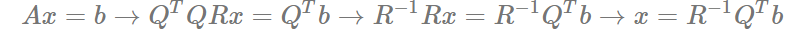
    


In [22]:
#  Ax=b의 최소제곱해?

In [23]:
A=np.array([[1,3,5],[1,1,0],[1,1,2],[1,3,3]]); A
b=np.array([[3],[5],[7],[-3]]);b

array([[ 3],
       [ 5],
       [ 7],
       [-3]])

In [24]:
q,r=LA.qr(A)

In [25]:
q


array([[-0.5,  0.5, -0.5],
       [-0.5, -0.5,  0.5],
       [-0.5, -0.5, -0.5],
       [-0.5,  0.5,  0.5]])

In [26]:
r

array([[-2., -4., -5.],
       [ 0.,  2.,  3.],
       [ 0.,  0., -2.]])

In [27]:
 hatx=np.dot(LA.inv(r), np.dot(q.T, b));hatx

array([[10.],
       [-6.],
       [ 2.]])

In [28]:
 ATA=np.dot(A.T, A);ATA

array([[ 4,  8, 10],
       [ 8, 20, 26],
       [10, 26, 38]])

In [29]:
ATb=np.dot(A.T, b);ATb

array([[12],
       [12],
       [20]])

In [30]:
 LA.det(ATA)

64.00000000000003

In [31]:
 hatx=LA.solve(ATA, ATb);hatx

array([[10.],
       [-6.],
       [ 2.]])